<a href="https://colab.research.google.com/github/Ayush-Kori/Quant-Dev-/blob/main/Kelly_formulas_toallocate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

In [39]:
df1=pd.read_excel('OIH.xls')
df2=pd.read_excel('RKH.xls')
df=pd.merge(df1,df2, on='Date', suffixes=('_OIH', '_RKH'))

In [40]:
df.set_index('Date', inplace=True)


In [41]:
df3=pd.read_excel('RTH.xls')
df=pd.merge(df, df3, on='Date')
df.rename(columns={"Adj Close": "Adj Close_RTH"}, inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
pd.DataFrame(df)

,Open_OIH,High_OIH,Low_OIH,Close_OIH,Volume_OIH,Adj Close_OIH,Open_RKH,High_RKH,Low_RKH,Close_RKH,Volume_RKH,Adj Close_RKH,Open,High,Low,Close,Volume,Adj Close_RTH
Date,,,,,,,,,,,,,,,,,,
2001-05-17,91.25,94.00,90.25,93.93,276900,84.60,115.40,117.00,115.40,116.25,18500,93.63,97.75,98.45,97.70,98.00,14200,87.09
2001-05-18,94.00,96.04,93.80,94.70,546300,85.30,116.50,116.70,115.85,115.85,81800,93.31,97.30,97.75,97.25,97.75,1900,86.87
2001-05-21,95.10,95.58,93.96,95.55,627500,86.06,116.00,116.00,115.00,116.00,26500,93.43,98.20,100.15,97.80,99.95,15900,88.83
2001-05-22,95.46,95.46,93.70,94.10,371700,84.76,115.80,118.60,115.80,118.13,37900,95.15,99.75,100.90,99.15,100.10,88500,88.96
2001-05-23,93.00,93.00,90.52,90.57,682400,81.58,117.75,118.16,117.41,118.00,21300,95.04,98.80,98.80,97.95,98.20,4300,87.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-21,182.99,188.30,182.51,188.30,4633500,188.30,131.03,133.34,130.19,133.28,580400,132.96,93.23,94.81,93.23,94.36,2924900,94.35
2007-12-24,189.61,189.94,186.61,189.70,1284300,189.70,134.22,135.63,134.07,134.95,214400,134.62,94.01,95.65,94.01,95.55,1216700,95.55
2007-12-26,190.05,193.61,189.15,193.60,2395800,193.60,133.98,134.62,133.26,134.43,474600,134.11,95.08,95.08,93.86,94.80,3023300,94.80


In [42]:
dailyret=df.loc[:, ('Adj Close_OIH', 'Adj Close_RKH', 'Adj Close_RTH')].pct_change()
dailyret.rename(columns={"Adj Close_OIH": "OIH", "Adj Close_RKH": "RKH", "Adj Close_RTH": "RTH"}, inplace=True)

In [43]:
excessRet=dailyret-0.04/252
M=252*excessRet.mean()
M

,0
OIH,0.139568
RKH,0.029400
RTH,-0.007346


In [44]:
C=252*excessRet.cov()
C

,OIH,RKH,RTH
OIH,0.110901,0.020014,0.018255
RKH,0.020014,0.037165,0.026893
RTH,0.018255,0.026893,0.041967


In [45]:
 F=np.dot(inv(C), M)
 F

array([ 1.2919082 ,  1.17226473, -1.48821285])

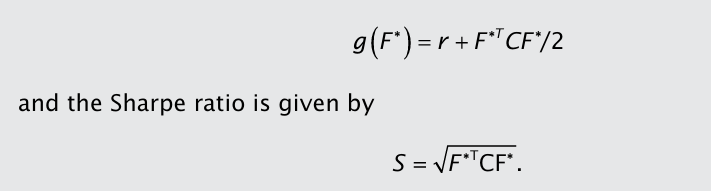

Maximum Annualize compounded growth rate   g = r = S^2/2





In [47]:
g=0.04+np.dot(F.T, np.dot(C,F))/2
g

np.float64(0.15285357898405597)

In [50]:
S=np.sqrt(np.dot(F.T, np.dot(C,F)))
S

np.float64(0.4750864742003417)